In [1]:
import pandas as pd
import math
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

In [2]:
df1 = pd.read_csv("ad_data.csv")
df2  = pd.read_csv("customer_data.csv")

df = pd.merge(df1, df2, on='customer_id', how='left')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   ad_type           10000 non-null  object 
 2   ad_medium         10000 non-null  object 
 3   ad_response       10000 non-null  bool   
 4   items_purchased   10000 non-null  object 
 5   drinks_purchased  10000 non-null  object 
 6   state             10000 non-null  object 
 7   sex               10000 non-null  object 
 8   age               10000 non-null  float64
 9   occupation        10000 non-null  object 
 10  family_size       10000 non-null  int64  
 11  income            10000 non-null  int64  
dtypes: bool(1), float64(1), int64(3), object(7)
memory usage: 947.3+ KB


In [4]:
df['state'].unique()

array(['CA', 'OH', 'WV', 'MI', 'RI', 'IA', 'FL', 'AZ', 'TX', 'OK', 'LA',
       'GA', 'WA', 'AR', 'MN', 'CT', 'MO', 'DE', 'NC', 'IL', 'KY', 'WI',
       'AL', 'TN', 'NJ', 'KS', 'HI', 'VT', 'NE', 'NY', 'SC', 'IN', 'AK',
       'NH', 'NM', 'CO', 'MT', 'VA', 'ME', 'UT', 'WY', 'PA', 'MD', 'MS',
       'MA', 'ID', 'OR', 'NV', 'ND', 'SD'], dtype=object)

In [5]:
#This is the encoding for regions!

northeast = ['NH', 'VT', 'RI', 'CT', 'MA', 'NY', 'NJ', 'PA', 'DE', 'MD', 'ME']
midWest = ['OH', 'MI', 'WI', 'IN', 'IL', 'MO', 'MN', 'IA', 'KS', 'NE', 'ND', 'SD']
west = ['AZ', 'CO', 'ID', 'MT', 'NV', 'UT', 'WY', 'WA', 'OR', 'CA', 'AK', 'HI', 'NM']
south = ['DE', 'FL', 'GA', 'KY', 'LA', 'MD', 'MS', 'NC', 'OK', 'SC', 'TN', 'TX', 'VA', 'WV', 'AR', 'AL']

#for region in df['state']:
  #  if region == northeast:
df['region'] = 0
df.loc[df['state'].isin(northeast), 'region'] = 1
df.loc[df['state'].isin(midWest), 'region'] = 2
df.loc[df['state'].isin(west), 'region'] = 3
df.loc[df['state'].isin(south), 'region'] = 4


In [6]:
df["ad_medium"].unique()

array(['15 sec YouTube ad', '30 sec Hulu commercial',
       'Instagram photo ad', '30 sec cable TV ad', 'Static Facebook ad',
       'Newspaper ad', '15 sec TikTok ad'], dtype=object)

In [7]:
df['medium_code'] = 0

In [8]:
youtube = ["15 sec YouTube ad"]
hulu = ["30 sec Hulu commercial"]
instagram = ["Instagram photo ad"]
cable = ["30 sec cable TV ad"]
facebook = ["Static Facebook ad"]
newspaper = ["Newspaper ad"]
tiktok = ["15 sec TikTok ad"]

In [9]:
#This is the encoding for the type of medium because why not.

df.loc[df['ad_medium'].isin(youtube), 'medium_code'] = 1
df.loc[df['ad_medium'].isin(hulu), 'medium_code'] = 2
df.loc[df['ad_medium'].isin(instagram), 'medium_code'] = 3
df.loc[df['ad_medium'].isin(cable), 'medium_code'] = 4
df.loc[df['ad_medium'].isin(facebook), 'medium_code'] = 5
df.loc[df['ad_medium'].isin(newspaper), 'medium_code'] = 6
df.loc[df['ad_medium'].isin(tiktok), 'medium_code'] = 7

In [14]:
# THIS IS SO MUCH FASTER...
#occupation_mapping = {
#    "Retail": 1,
#    "Government": 2,
#    "Healthcare": 3,
#    "Food Service": 4,
#   "Education": 5,
#    "Other": 6,
#    "IT": 7,
#    "Unemployed": 8,
#    "Student": 9,
#    "Retired": 11
#}

# Use map to assign codes based on the 'occupation' column
#df["occu_code"] = df["occupation"].map(occupation_mapping).fillna(0).astype(int)


In [15]:
df["occupation"].value_counts()

Retail          2397
Government      2308
Healthcare      1274
Food Service     913
Education        811
Other            658
IT               581
Unemployed       382
Student          374
Retired          302
Name: occupation, dtype: int64

In [16]:
df["occu_code"] = 0
Retail = ['Retail']
Government = ["Government"]
Healthcare = ["Healthcare"]
Food_service = ["Food Service"]
Education = ["Education"]
Other  = ["Other"]
IT = ["IT"]
Unemployed = ["Unemployed"]
Student = ["Student"]
Retired = ["Retired"]

In [17]:
# This is the encoding for occupations!

df.loc[df['occupation'].isin(Retail), 'occu_code'] = 1
df.loc[df['occupation'].isin(Government), 'occu_code'] = 2
df.loc[df['occupation'].isin(Healthcare), 'occu_code'] = 3
df.loc[df['occupation'].isin(Food_service), 'occu_code'] = 4
df.loc[df['occupation'].isin(Education), 'occu_code'] = 5
df.loc[df['occupation'].isin(Other), 'occu_code'] = 6
df.loc[df['occupation'].isin(IT), 'occu_code'] = 7
df.loc[df['occupation'].isin(Unemployed), 'occu_code'] = 8
df.loc[df['occupation'].isin(Student), 'occu_code'] = 9
df.loc[df['occupation'].isin(Retired), 'occu_code'] = 11

In [18]:
df['ad_type'].unique()

array(['BOGO - Garlic Steak Nacho Fries', 'DISCOUNT-50%',
       'REWARD - Free Garlic Steak Nacho Fries with purchase of $20 or more',
       'DISCOUNT-5%', 'DISCOUNT-10%', 'BOGO - Baja Blast',
       'REWARD - Free Baja Blast with purchase of $20 or more',
       'DISCOUNT-20%'], dtype=object)

In [19]:
#This is the encoding for the type of ad! Why? Cause yeah.

df['ad_type_enco'] = 0

Bogo = ['BOGO - Garlic Steak Nacho Fries']
Discount = ['DISCOUNT-50%']
Reward = ['REWARD - Free Garlic Steak Nacho Fries with purchase of $20 or more']
DiscountV2 = ['DISCOUNT-5%']
DiscountV3 = ['DISCOUNT-10%']
BogoV2 = ['BOGO - Baja Blast']
RewardV2 = ['REWARD - Free Baja Blast with purchase of $20 or more']
DiscountV4 = ['DISCOUNT-20%']

In [20]:
df.loc[df['ad_type'].isin(Bogo), 'ad_type_enco'] = 1
df.loc[df['ad_type'].isin(Discount), 'ad_type_enco'] = 2
df.loc[df['ad_type'].isin(Reward), 'ad_type_enco'] = 3
df.loc[df['ad_type'].isin(DiscountV2), 'ad_type_enco'] = 4
df.loc[df['ad_type'].isin(DiscountV3), 'ad_type_enco'] = 5
df.loc[df['ad_type'].isin(BogoV2), 'ad_type_enco'] = 6
df.loc[df['ad_type'].isin(RewardV2), 'ad_type_enco'] = 7
df.loc[df['ad_type'].isin(DiscountV4), 'ad_type_enco'] = 8

In [21]:
#sn.scatterplot(data=df, x="age", y="income")

In [22]:
taco_df, _ = train_test_split(df, test_size=0.2, random_state=42)
taco_df = taco_df[['income', 'age', 'family_size', 'region', 'medium_code', 'ad_type_enco']]

#taco_df.info()

In [23]:
taco_df.head()

,income,age,family_size,region,medium_code,ad_type_enco
9254,120082,33.0,4,3,1,4
1561,14611,24.0,0,4,1,1
1670,111870,55.0,1,1,2,8
6087,0,66.0,3,4,6,3
6669,100695,48.0,3,2,5,7


In [24]:
model = KMeans(n_clusters = 6)

In [25]:
model.fit(taco_df)

KMeans(n_clusters=6)

In [26]:
model.cluster_centers_

array([[5.16775149e+03, 4.09500595e+01, 2.16052319e+00, 3.19738407e+00,
        3.92865636e+00, 4.31034483e+00],
       [1.52542811e+05, 4.81813084e+01, 2.19626168e+00, 2.77757009e+00,
        3.27663551e+00, 4.49719626e+00],
       [6.91027831e+04, 3.49451991e+01, 1.77002342e+00, 2.82107728e+00,
        2.67868852e+00, 4.50819672e+00],
       [2.35766708e+05, 5.64108108e+01, 2.36756757e+00, 3.04324324e+00,
        3.89729730e+00, 4.35675676e+00],
       [1.02742647e+05, 4.20114943e+01, 2.02835249e+00, 2.78544061e+00,
        2.70038314e+00, 4.52030651e+00],
       [4.06332841e+04, 3.60103368e+01, 1.75658553e+00, 2.81327109e+00,
        2.78592864e+00, 4.51550517e+00]])

In [27]:
#X = df[['family_size', 'income', 'region', 'medium_code']]

sil_score = silhouette_score(taco_df, model.labels_)

In [28]:
sil_score    

0.6052849514062437

In [29]:
k_range = range(1, 11)
sse = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(taco_df)
    sse.append(kmeans.inertia_)

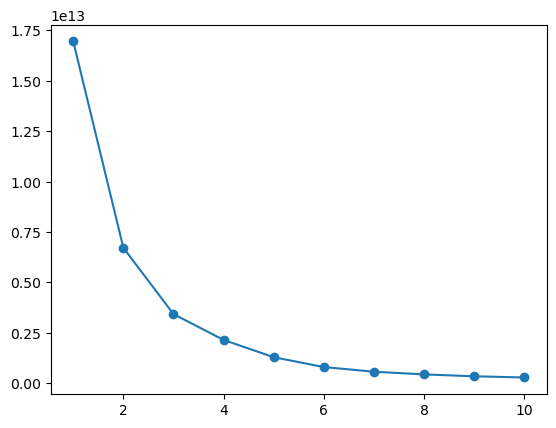

In [30]:
plt.plot(k_range, sse, marker='o')

In [31]:
df["occupation"].unique()

array(['Government', 'Retail', 'IT', 'Education', 'Retired', 'Unemployed',
       'Food Service', 'Healthcare', 'Student', 'Other'], dtype=object)

In [32]:
# 'income', 'age', 'family_size', 'region', 'medium_code', 'ad_type_enco'

In [33]:
model.cluster_centers_


array([[5.16775149e+03, 4.09500595e+01, 2.16052319e+00, 3.19738407e+00,
        3.92865636e+00, 4.31034483e+00],
       [1.52542811e+05, 4.81813084e+01, 2.19626168e+00, 2.77757009e+00,
        3.27663551e+00, 4.49719626e+00],
       [6.91027831e+04, 3.49451991e+01, 1.77002342e+00, 2.82107728e+00,
        2.67868852e+00, 4.50819672e+00],
       [2.35766708e+05, 5.64108108e+01, 2.36756757e+00, 3.04324324e+00,
        3.89729730e+00, 4.35675676e+00],
       [1.02742647e+05, 4.20114943e+01, 2.02835249e+00, 2.78544061e+00,
        2.70038314e+00, 4.52030651e+00],
       [4.06332841e+04, 3.60103368e+01, 1.75658553e+00, 2.81327109e+00,
        2.78592864e+00, 4.51550517e+00]])

In [35]:
df.head(50)

,customer_id,ad_type,ad_medium,ad_response,items_purchased,drinks_purchased,state,sex,age,occupation,family_size,income,region,medium_code,occu_code,ad_type_enco
0,3226,BOGO - Garlic Steak Nacho Fries,15 sec YouTube ad,True,"['steak garlic nacho fries', 'steak garlic nac...","['gatorade', 'mug root beer', 'baja blast', 'd...",CA,M,30.0,Government,5,62303,3,1,2,1
1,5217,DISCOUNT-50%,15 sec YouTube ad,False,"['crunchy taco', 'cheesy bean and rice burrito']","['gatorade', 'diet pepsi']",OH,M,36.0,Retail,1,39638,2,1,1,2
2,5247,REWARD - Free Garlic Steak Nacho Fries with pu...,15 sec YouTube ad,True,"['steak garlic nacho fries', 'cheesy gordita c...","['mountain dew', 'starry']",WV,M,31.0,IT,1,112766,4,1,7,3
3,7793,DISCOUNT-5%,30 sec Hulu commercial,False,"['crunchwrap supreme', 'cravings box', 'crunch...","['baja blast', 'brisk', 'mountain dew']",MI,F,57.0,Government,2,137374,2,2,2,4
4,5759,DISCOUNT-50%,15 sec YouTube ad,False,"['nachos bellgrande', 'crunchy taco']","['pepsi', 'diet pepsi']",RI,M,22.0,Education,1,41748,1,1,5,2
5,9639,DISCOUNT-10%,Instagram photo ad,False,"['nachos bellgrande', 'steak garlic nacho frie...","['mug root beer', 'mountain dew', 'mountain de...",IA,F,39.0,Retail,3,42286,2,3,1,5
6,8326,DISCOUNT-10%,30 sec cable TV ad,False,"['crunchy taco', 'beefy 5 layer burrito', 'cra...","['pepsi', 'diet pepsi', 'brisk', 'mountain dew...",FL,M,65.0,Retired,5,0,4,4,11,5
7,297,DISCOUNT-10%,Instagram photo ad,True,"['crunchy taco', 'mexican pizza']","['starry', 'gatorade']",AZ,M,31.0,Unemployed,1,0,3,3,8,5
8,4355,BOGO - Baja Blast,15 sec YouTube ad,False,['chicken quesadilla'],['starry'],TX,M,34.0,Retail,0,41034,4,1,1,6
9,3444,DISCOUNT-10%,30 sec cable TV ad,True,"['cheesy bean and rice burrito', 'beefy 5 laye...","['starry', 'baja blast', 'baja blast']",FL,F,61.0,Government,2,157637,4,4,2,5
